# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

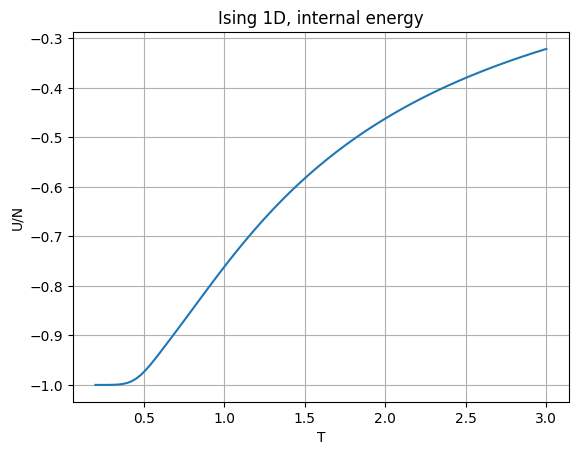

In [157]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.grid(True)
plt.show()

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

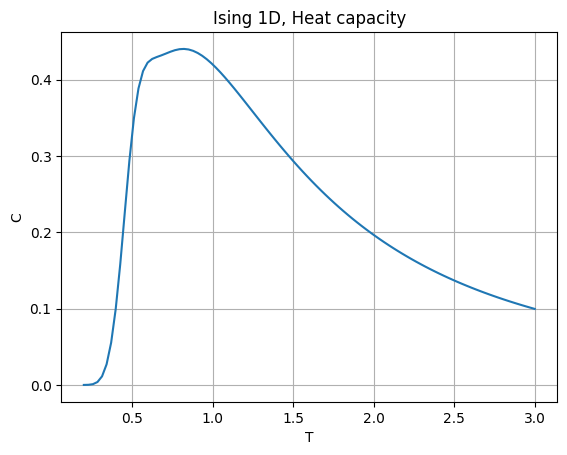

In [158]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.grid(True)
plt.show()

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

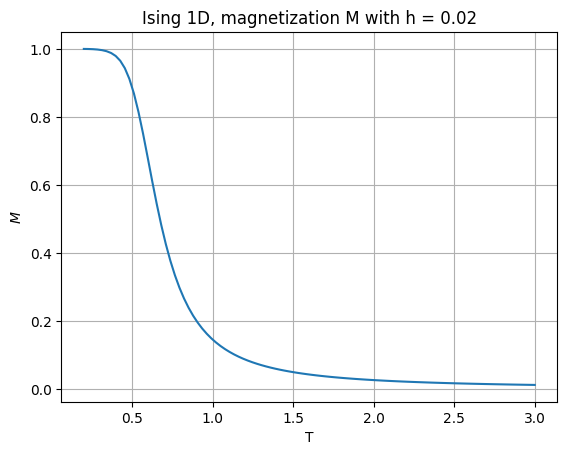

In [159]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.grid(True)
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

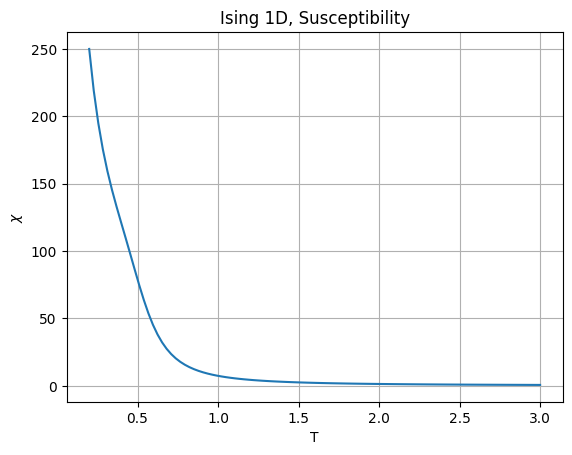

In [160]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.grid(True)
plt.show()

### Exercise 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

### Parte mia

In [161]:
points=4
T_1 = np.linspace(0.5,2.0,num=points)
beta = 1/T_1
J = 1.0
Ns = 50
th = np.tanh(J/T_1)
thN= th**Ns
ch = 1/th
e_1 = -J*( th + ch*thN )/( 1 + thN )
heat_1=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
X_1 = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
b = 1/T_1
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M_1 = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

### Termalizzazione $h\,=\,0$

La termalizzazione risulta essere molto veloce: il tutto avviene in poche Monte-Carlo moves.

In [162]:
term = np.loadtxt("Osservabili/TermEne.dat", unpack=True)

##### Metodo Metropolis

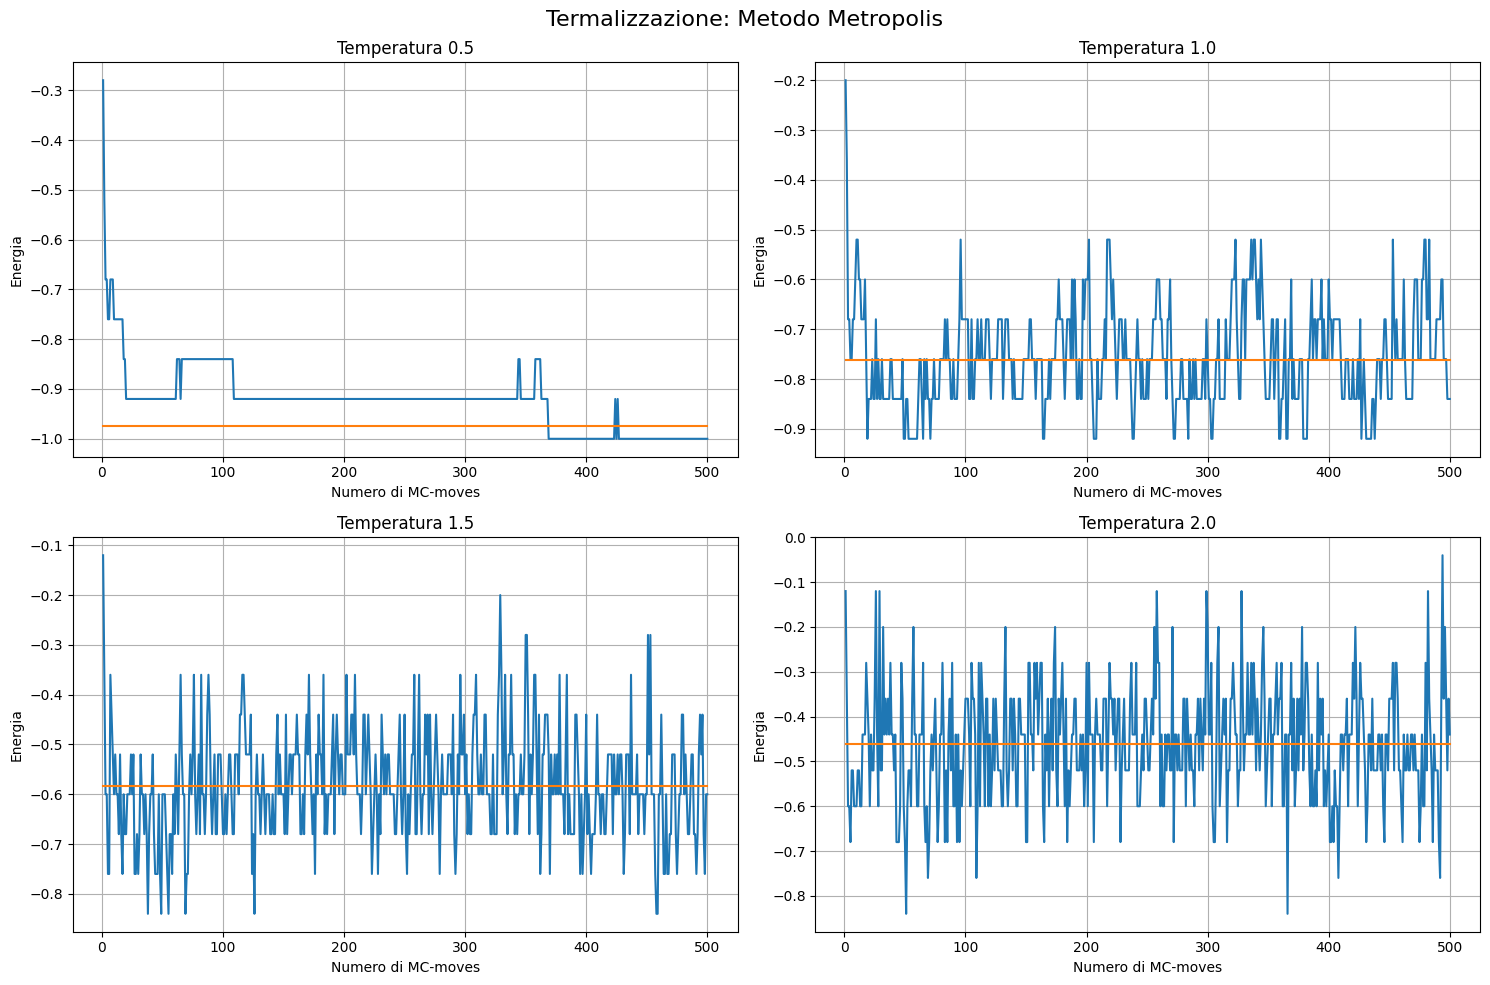

In [163]:
figura, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(0, 2):
    for j in range(0, 2):
        axes[i][j].plot(term[0, (2*i + j) * 500 : 500 + (2*i + j) * 500], term[1, (2*i + j) * 500 : 500 + (2*i + j) * 500], label = "Stima")
        axes[i][j].plot(term[0, (2*i + j) * 500 : 500 + (2*i + j) * 500], np.array([e_1[2*i + j] for k in range(0, 500)]), label = "Vero")
        axes[i][j].set_xlabel('Numero di MC-moves')
        axes[i][j].set_ylabel('Energia')
        axes[i][j].set_title('Temperatura ' + str(round(0.5 + (2*i + j) * 0.5, 2)))
        axes[i][j].grid(True)

figura.suptitle('Termalizzazione: Metodo Metropolis', fontsize = '16')

plt.tight_layout()
plt.show()

##### Metodo Gibbs

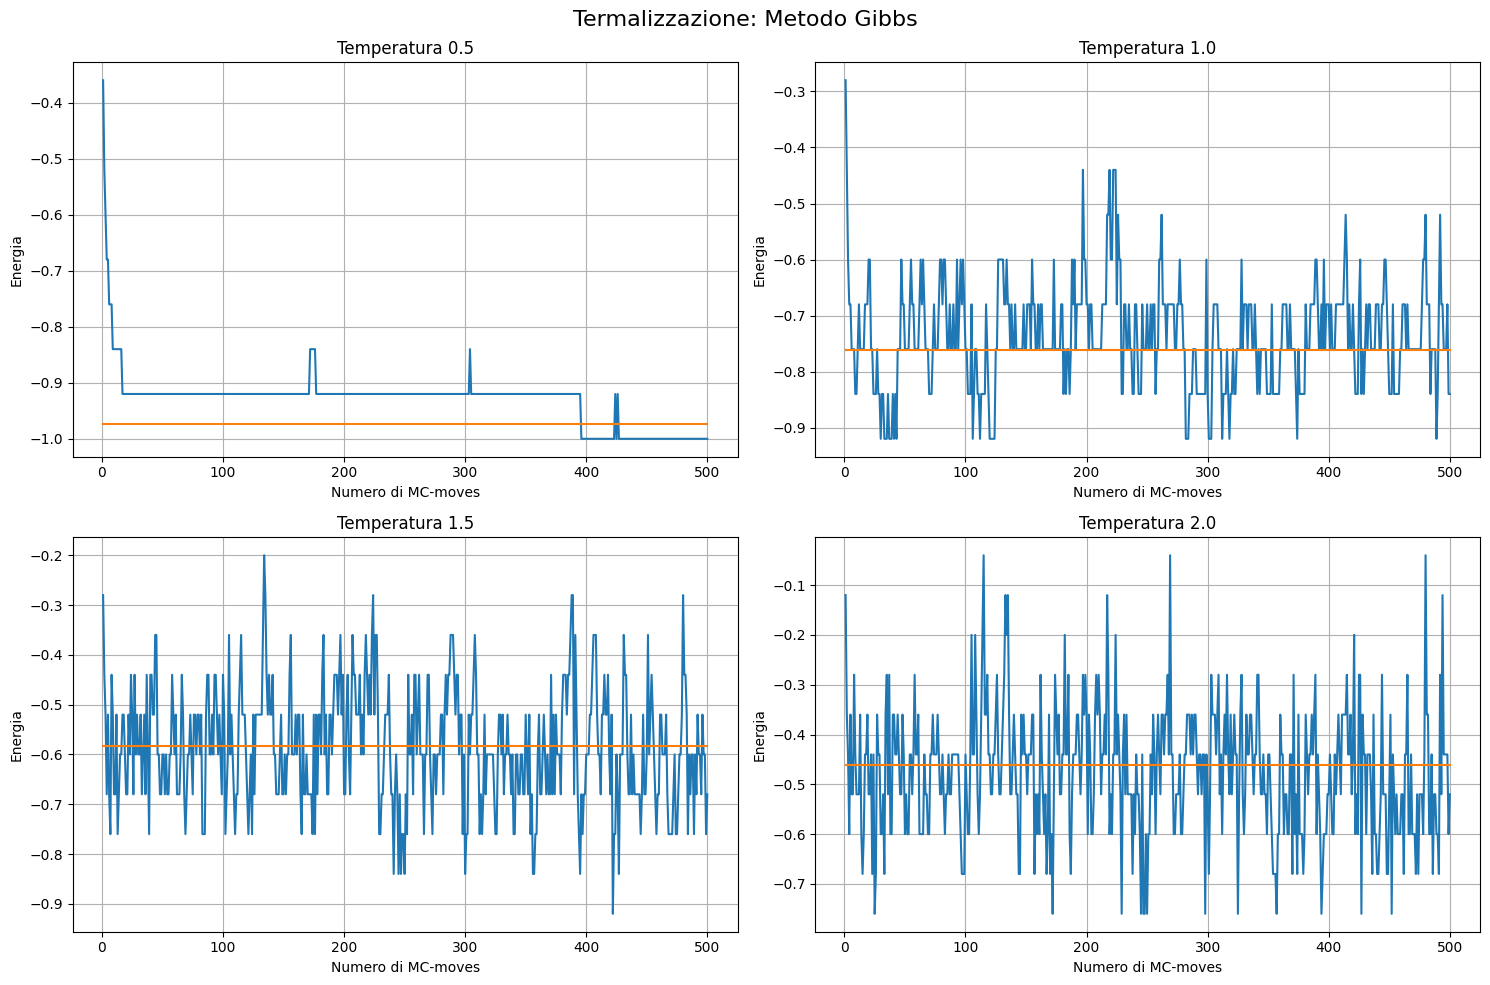

In [164]:
figura, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(0, 2):
    for j in range(0, 2):
        axes[i][j].plot(term[0, 2000 + (2*i + j) * 500 : 2500 + (2*i + j) * 500], term[1, 2000 + (2*i + j) * 500 : 2500 + (2*i + j) * 500], label = "Stima")
        axes[i][j].plot(term[0, 2000 + (2*i + j) * 500 : 2500 + (2*i + j) * 500], np.array([e_1[2*i + j] for k in range(0, 500)]), label = "Vero")
        axes[i][j].set_xlabel('Numero di MC-moves')
        axes[i][j].set_ylabel('Energia')
        axes[i][j].set_title('Temperatura ' + str(round(0.5 + (2*i + j) * 0.5, 2)))
        axes[i][j].grid(True)

figura.suptitle('Termalizzazione: Metodo Gibbs', fontsize = '16')

plt.tight_layout()
plt.show()

### Termalizzazione $h\,=\,0.02$

In [165]:
h_1=0.02 #external field
b_1 = 1/T_1

l_1 = np.exp(b_1*J)*np.cosh(b_1*h_1)+np.sqrt(np.exp(2*b_1*J)*np.cosh(b_1*h_1)*np.cosh(b_1*h_1)-2*np.sinh(2*b_1*J))
l_2 = np.exp(b_1*J)*np.cosh(b_1*h_1)-np.sqrt(np.exp(2*b_1*J)*np.cosh(b_1*h_1)*np.cosh(b_1*h_1)-2*np.sinh(2*b_1*J))
Z_1 = l_1**Ns + l_2**Ns
M_1 = (np.exp(b_1*J)*np.sinh(b_1*h_1)*((l_1**(Ns-1))*(1+np.exp(b_1*J)*np.cosh(b_1*h_1)/np.sqrt(np.exp(2*b_1*J)*np.cosh(b_1*h_1)*np.cosh(b_1*h_1)-2*np.sinh(2*b_1*J))) 
        + (l_2**(Ns-1))*(1-np.exp(b_1*J)*np.cosh(b_1*h_1)/np.sqrt(np.exp(2*b_1*J)*np.cosh(b_1*h_1)*np.cosh(b_1*h_1)-2*np.sinh(2*b_1*J)))))/(Z_1)

##### Metodo Metropolis

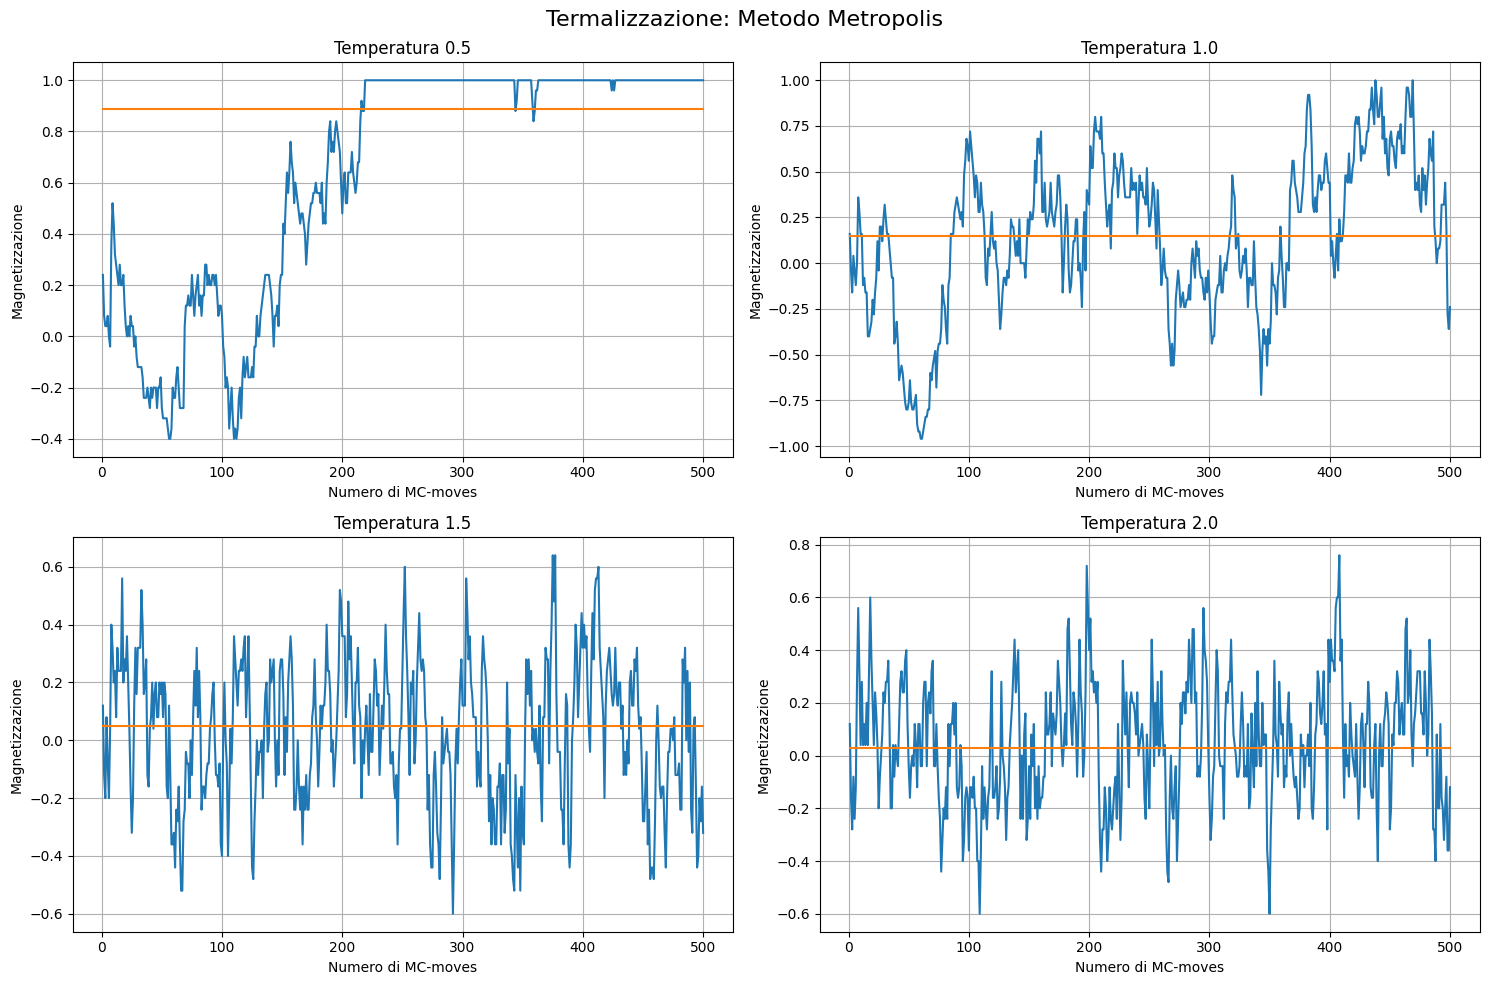

In [166]:
termh = np.loadtxt("Osservabili/TermMagn.dat", unpack=True)

figura, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(0, 2):
    for j in range(0, 2):
        axes[i][j].plot(termh[0, (2*i + j) * 500 : 500 + (2*i + j) * 500], termh[1, (2*i + j) * 500 : 500 + (2*i + j) * 500], label = "Stima")
        axes[i][j].plot(termh[0, (2*i + j) * 500 : 500 + (2*i + j) * 500], np.array([M_1[2*i + j] for k in range(0, 500)]), label = "Vero")
        axes[i][j].set_xlabel('Numero di MC-moves')
        axes[i][j].set_ylabel('Magnetizzazione')
        axes[i][j].set_title('Temperatura ' + str(round(0.5 + (2*i + j) * 0.5, 2)))
        axes[i][j].grid(True)

figura.suptitle('Termalizzazione: Metodo Metropolis', fontsize = '16')

plt.tight_layout()
plt.show()

##### Metodo di Gibbs

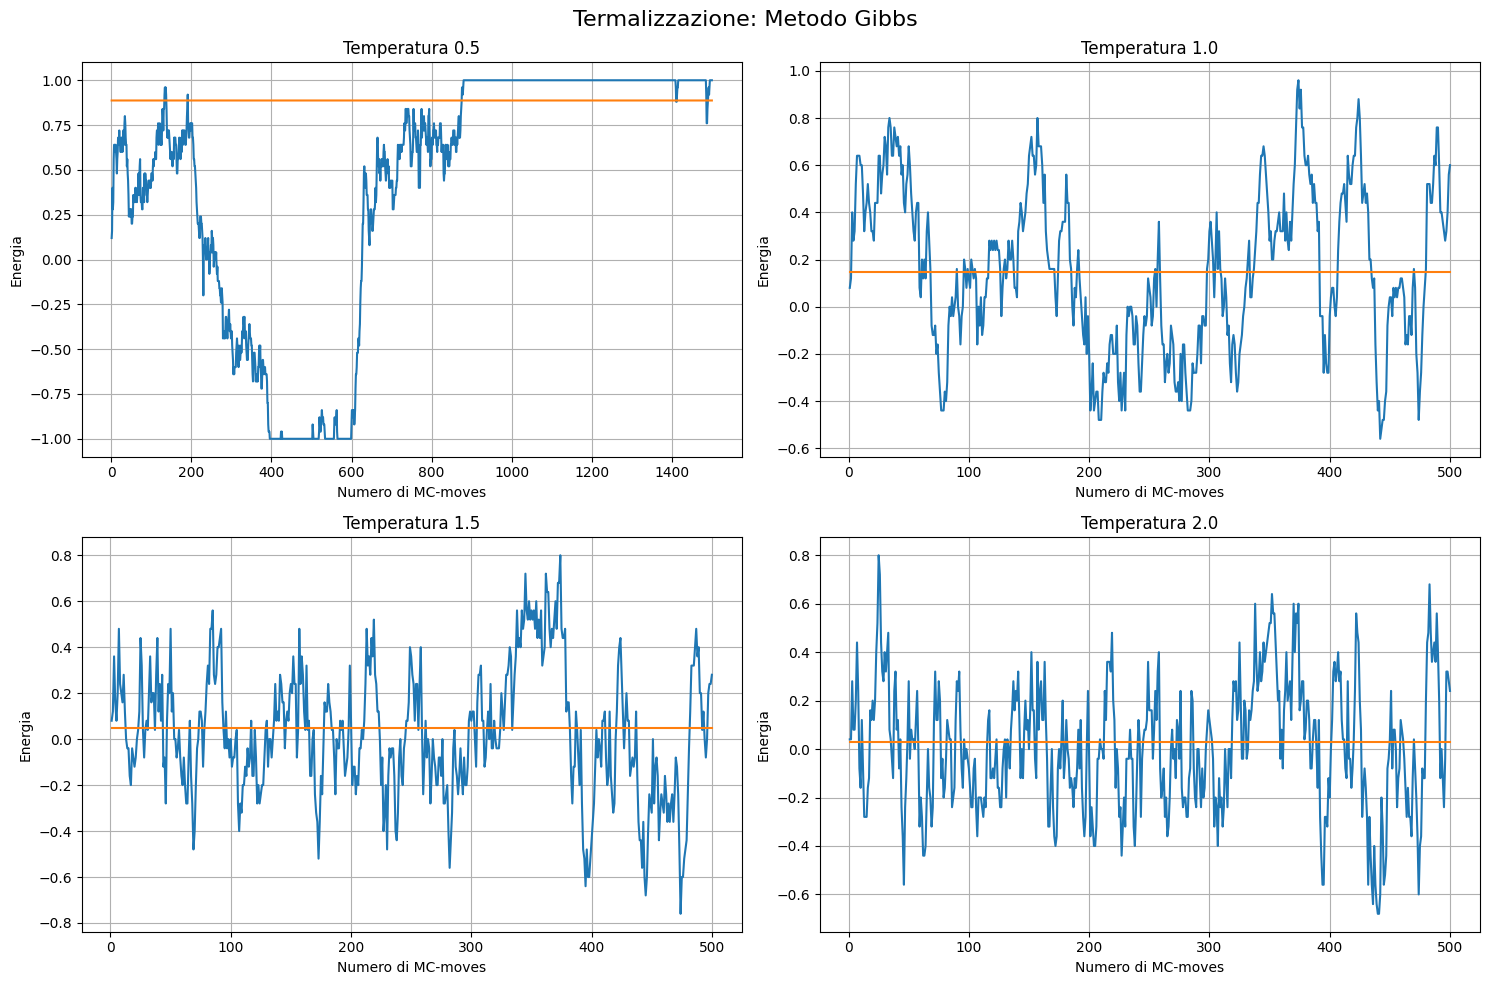

In [167]:
figura, axes = plt.subplots(2, 2, figsize=(15, 10))

for i in range(0, 2):
    for j in range(0, 2):

        if i==0 and j==0:
            axes[i][j].plot(termh[0, 2000 : 3500], termh[1, 2000 : 3500], label = "Stima")
            axes[i][j].plot(termh[0, 2000 : 3500], np.array([M_1[0] for k in range(0, 1500)]), label = "Vero")
        
        else:
            axes[i][j].plot(termh[0, 3000 + (2*i + j) * 500 : 3500 + (2*i + j) * 500], termh[1, 3000 + (2*i + j) * 500 : 3500 + (2*i + j) * 500], label = "Stima")
            axes[i][j].plot(termh[0, 3000 + (2*i + j) * 500 : 3500 + (2*i + j) * 500], np.array([M_1[2*i + j] for k in range(0, 500)]), label = "Vero")
        
        axes[i][j].set_xlabel('Numero di MC-moves')
        axes[i][j].set_ylabel('Energia')
        axes[i][j].set_title('Temperatura ' + str(round(0.5 + (2*i + j) * 0.5, 2)))
        axes[i][j].grid(True)

figura.suptitle('Termalizzazione: Metodo Gibbs', fontsize = '16')

plt.tight_layout()
plt.show()

Per la parte riguardante i valori di aspettazione degli osservabili le simulazioni vengono effettuate con 50 blocchi da 10000 singole move.

In [168]:
points=16
T_1 = np.linspace(0.5,2.0,num=points)
beta = 1/T_1
J = 1.0
Ns = 50
th = np.tanh(J/T_1)
thN= th**Ns
ch = 1/th
e_1 = -J*( th + ch*thN )/( 1 + thN )
heat_1=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
X_1 = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
b = 1/T_1
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M_1 = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

##### Energia

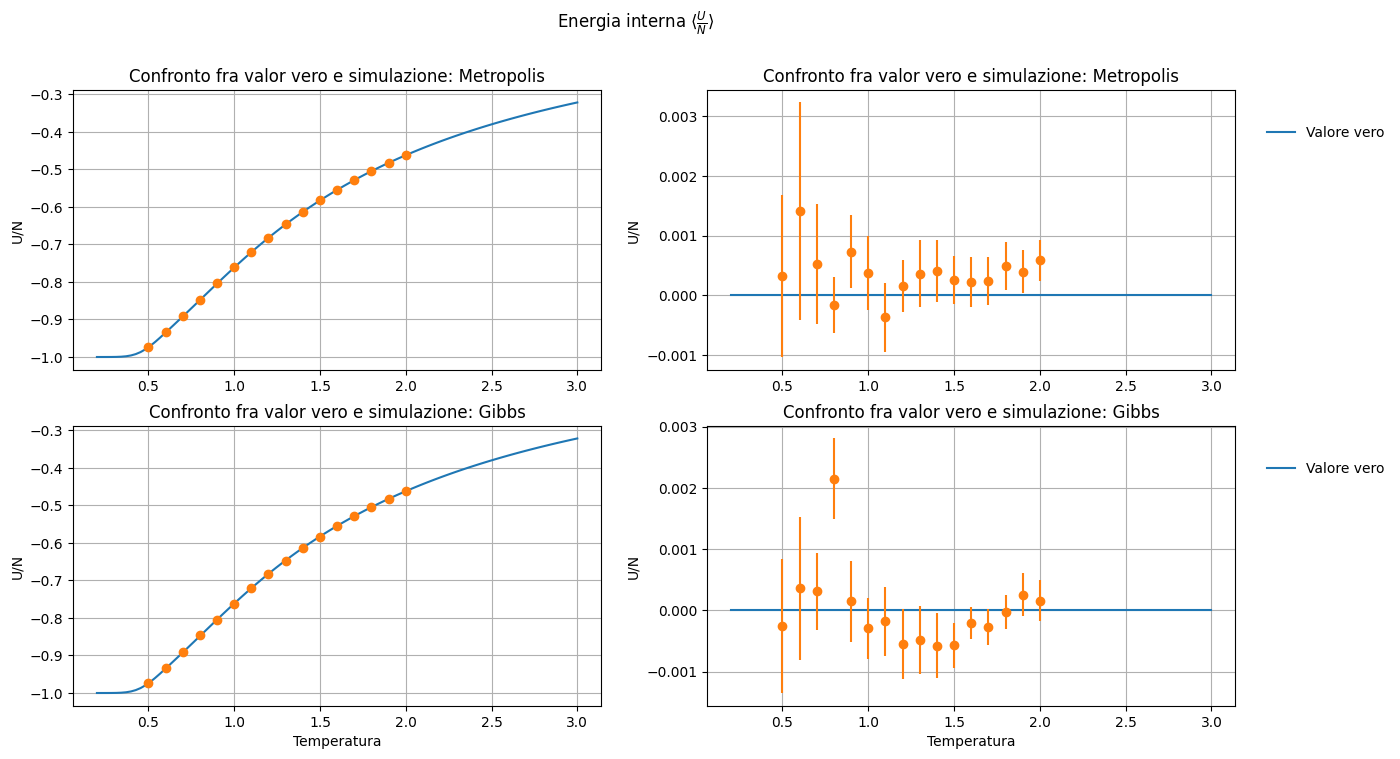

In [169]:
##Carico dati da file
energia = np.loadtxt("Osservabili/Energia.dat", unpack=True)

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
titoli = ['Metropolis', 'Gibbs']

for i in range(0, 2):
    for j in range(0, 2):

        if j == 0:
            axes[i][j].plot(T, e)
            axes[i][j].errorbar(energia[0, 0 + 16*i: 16*(1+i)], energia[1, 0 + 16*i: 16*(1+i)], yerr = energia[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o')

        else:
            axes[i][j].plot(T, np.zeros(100), label = 'Valore vero')
            axes[i][j].errorbar(energia[0, 0 + 16*i: 16*(1+i)], energia[1, 0 + 16*i: 16*(1+i)] - e_1, yerr = energia[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o')
            axes[i][j].legend(loc=(1.05, 0.8), frameon=False)

        axes[1][j].set_xlabel('Temperatura')
        axes[i][j].set_ylabel('U/N')
        axes[i][j].set_title('Confronto fra valor vero e simulazione: ' + titoli[i])
        axes[i][j].grid(True)

fig.suptitle(r'Energia interna $\langle\frac{U}{N}\rangle$')

plt.show()

##### Calore specifico

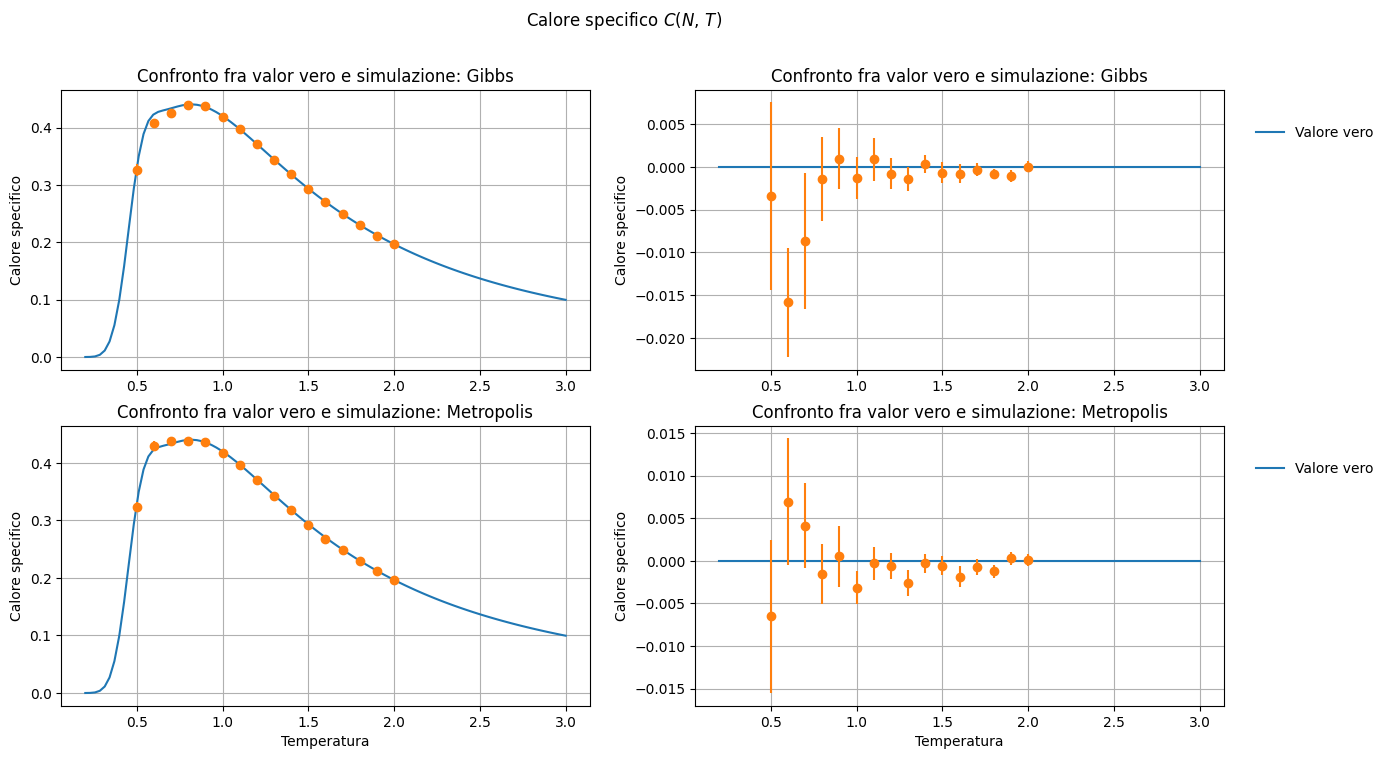

In [170]:
##Carico dati da file
cal_spec = np.loadtxt("Osservabili/CaloreSpecifico.dat", unpack=True)

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
titoli = ['Gibbs', 'Metropolis']

for i in range(0, 2):
    for j in range(0, 2):

        if j == 0:
            axes[i][j].plot(T, heat)
            axes[i][j].errorbar(cal_spec[0, 0 + 16*i: 16*(1+i)], cal_spec[1, 0 + 16*i: 16*(1+i)], yerr = cal_spec[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o')

        else:
            axes[i][j].plot(T, np.zeros(100), label = 'Valore vero')
            axes[i][j].errorbar(cal_spec[0, 0 + 16*i: 16*(1+i)], cal_spec[1, 0 + 16*i: 16*(1+i)] - heat_1, yerr = cal_spec[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o')
            axes[i][j].legend(loc=(1.05, 0.8), frameon=False)

        axes[1][j].set_xlabel('Temperatura')
        axes[i][j].set_ylabel('Calore specifico')
        axes[i][j].set_title('Confronto fra valor vero e simulazione: ' + titoli[i])
        axes[i][j].grid(True)

fig.suptitle(r'Calore specifico $C\left(N,\,T\right)$')

plt.show()

##### Magnetizzazione

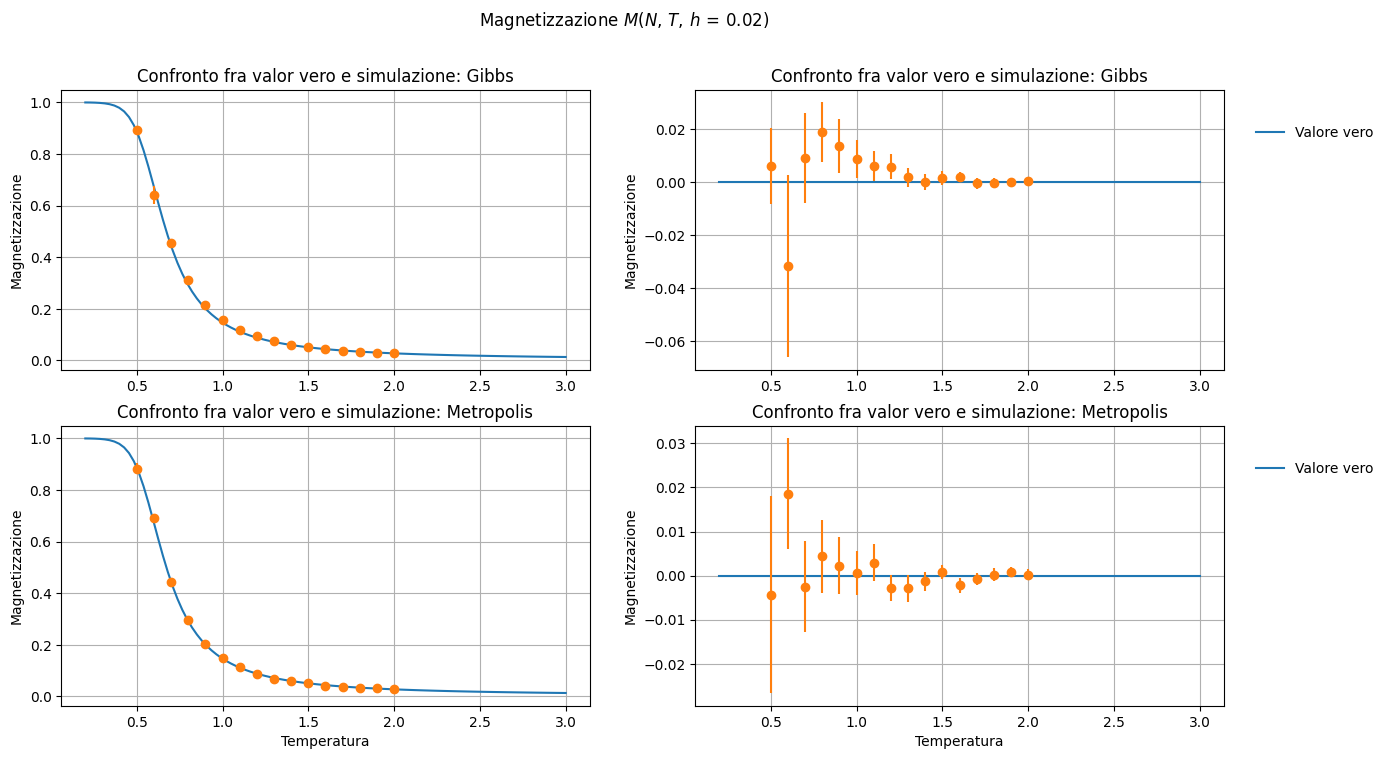

In [171]:
##Carico dati da file
magn = np.loadtxt("Osservabili/Magnetizzazione.dat", unpack=True)

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
titoli = ['Gibbs', 'Metropolis']

for i in range(0, 2):
    for j in range(0, 2):

        if j == 0:
            axes[i][j].plot(T, M)
            axes[i][j].errorbar(magn[0, 0 + 16*i: 16*(1+i)], magn[1, 0 + 16*i: 16*(1+i)], yerr = magn[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o')

        else:
            axes[i][j].plot(T, np.zeros(100), label = 'Valore vero')
            axes[i][j].errorbar(magn[0, 0 + 16*i: 16*(1+i)], magn[1, 0 + 16*i: 16*(1+i)] - M_1, yerr = magn[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o')
            axes[i][j].legend(loc=(1.05, 0.8), frameon=False)

        axes[1][j].set_xlabel('Temperatura')
        axes[i][j].set_ylabel('Magnetizzazione')
        axes[i][j].set_title('Confronto fra valor vero e simulazione: ' + titoli[i])
        axes[i][j].grid(True)

fig.suptitle(r'Magnetizzazione $M\left(N,\,T,\,h\,=\,0.02\right)$')

plt.show()

##### Suscettibilità magnetica

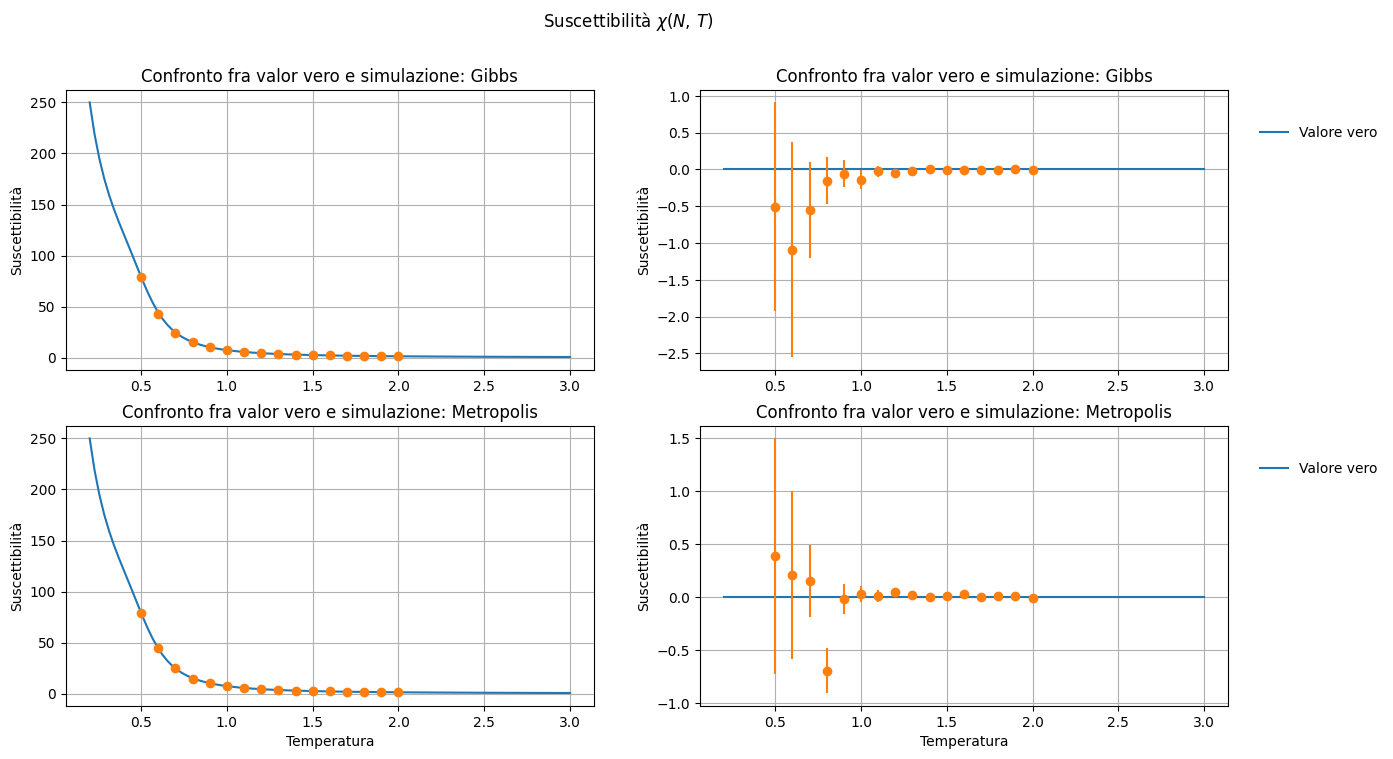

In [172]:
##Carico dati da file
susc_magn = np.loadtxt("Osservabili/Suscettibilità.dat", unpack=True)

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
titoli = ['Gibbs', 'Metropolis']

for i in range(0, 2):
    for j in range(0, 2):

        if j == 0:
            axes[i][j].plot(T, X)
            axes[i][j].errorbar(susc_magn[0, 0 + 16*i: 16*(1+i)], susc_magn[1, 0 + 16*i: 16*(1+i)], yerr = susc_magn[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o')

        else:
            axes[i][j].plot(T, np.zeros(100), label = 'Valore vero')
            axes[i][j].errorbar(susc_magn[0, 0 + 16*i: 16*(1+i)], susc_magn[1, 0 + 16*i: 16*(1+i)] - X_1, yerr = susc_magn[2, 0 + 16*i: 16*(1+i)], linestyle = 'None', fmt = 'o')
            axes[i][j].legend(loc=(1.05, 0.8), frameon=False)

        axes[1][j].set_xlabel('Temperatura')
        axes[i][j].set_ylabel('Suscettibilità')
        axes[i][j].set_title('Confronto fra valor vero e simulazione: ' + titoli[i])
        axes[i][j].grid(True)

fig.suptitle(r'Suscettibilità $\chi\left(N,\,T\right)$')

plt.show()